<a href="https://colab.research.google.com/github/Valmir-unicap/Topicos-avancado-computacao-1/blob/main/pd3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

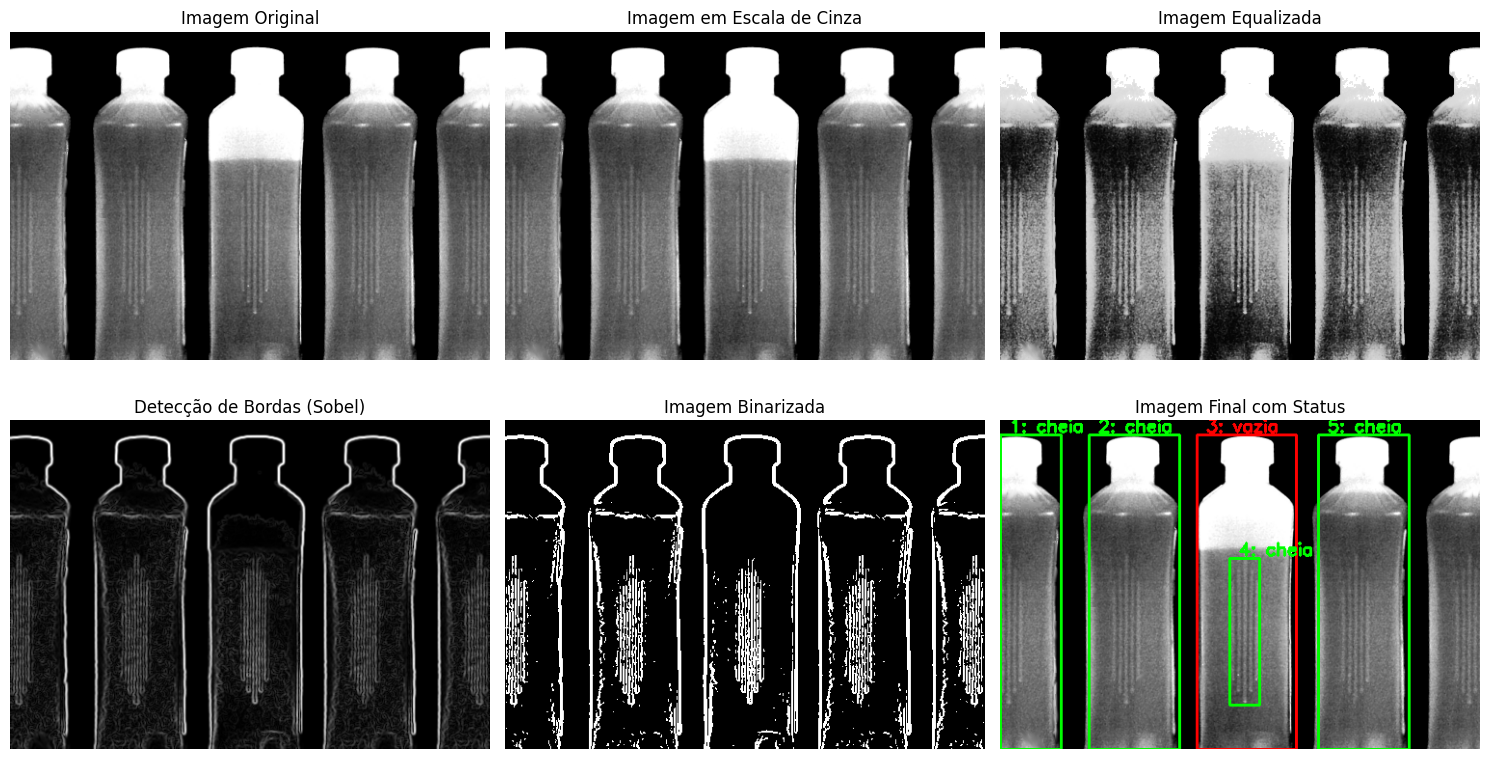

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_bottle_fill_level(image_path):

    image = cv2.imread(image_path)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    equalized_image = cv2.equalizeHist(gray_image)

    sobelx = cv2.Sobel(equalized_image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(equalized_image, cv2.CV_64F, 0, 1, ksize=5)
    sobel = np.hypot(sobelx, sobely)
    sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    _, thresholded = cv2.threshold(sobel, 50, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bottle_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]

    bottle_contours = sorted(bottle_contours, key=lambda x: cv2.boundingRect(x)[0])

    mean_intensities = []

    for cnt in bottle_contours:
        x, y, w, h = cv2.boundingRect(cnt)
        roi = gray_image[y:y+h, x:x+w]

        liquid_region = roi[int(h/3):int(2*h/3), :]
        mean_intensity = np.mean(liquid_region)
        mean_intensities.append(mean_intensity)


    if not mean_intensities:
        print("Nenhuma garrafa detectada.")
        return

    full_bottle_intensity = max(mean_intensities)
    threshold_factor = 0.9
    threshold_intensity = full_bottle_intensity * threshold_factor


    for i, mean_intensity in enumerate(mean_intensities):
        x, y, w, h = cv2.boundingRect(bottle_contours[i])
        if mean_intensity < threshold_intensity:
            status = "cheia"
        else:
            status = "vazia"


        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0) if status == "cheia" else (0, 0, 255), 2)
        cv2.putText(image, f" {i+1}: {status}", (x, y - 3), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0) if status == "cheia" else (0, 0, 255), 2)


    plt.figure(figsize=(15, 12))

    # Imagem Original
    plt.subplot(3, 3, 1)
    plt.title('Imagem Original')
    image2 = cv2.imread(image_path)
    plt.imshow(image2)
    plt.axis('off')

    # Imagem em Escala de Cinza
    plt.subplot(3, 3, 2)
    plt.title('Imagem em Escala de Cinza')
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')

    # Imagem Equalizada
    plt.subplot(3, 3, 3)
    plt.title('Imagem Equalizada')
    plt.imshow(equalized_image, cmap='gray')
    plt.axis('off')

    # Imagem com Detecção de Bordas (Sobel)
    plt.subplot(3, 3, 4)
    plt.title('Detecção de Bordas (Sobel)')
    plt.imshow(sobel, cmap='gray')
    plt.axis('off')

    # Imagem Binarizada
    plt.subplot(3, 3, 5)
    plt.title('Imagem Binarizada')
    plt.imshow(thresholded, cmap='gray')
    plt.axis('off')

    # Imagem Final com Status das Garrafas
    plt.subplot(3, 3, 6)
    plt.title('Imagem Final com Status')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Caminho da imagem
image_path = "/content/sample_data/FigP1126(bottles).png"
detect_bottle_fill_level(image_path)
